# Simple Group Data Generation Example
For the group data generation, the probability to have a true positive label is dependant on the previous predictions of the whole group. In the simple generator, points can either be sampled from the positive or negative cluster and the number of previous positive predictions defines the probability for a point to be sampled from one of the two clusters

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from aif360.algorithms.inprocessing import PrejudiceRemover
from methods.data.group_data_generator_simple import DataGenerator as GrpDataGen
from methods.long_term_fairness import LongTermFairnessPlot
from methods.aif360.longterm_aif import AifLongTermMetric, AifLongTermPrediction

Import error: No module named 'tensorflow'


In [2]:
generator = GrpDataGen(mean_pos=[0, 1],
                       mean_neg=[8, 9],
                       num_positive_label=100,
                       num_negative_label=100,
                       discrimination_factor=.9)

In [3]:
metric = AifLongTermMetric()

In [4]:
clf = AifLongTermPrediction(PrejudiceRemover())

In [5]:
l = LongTermFairnessPlot(generator.generate_data, clf, metric.metric, x_lim=[-3, 12], y_lim=[-1, 13])

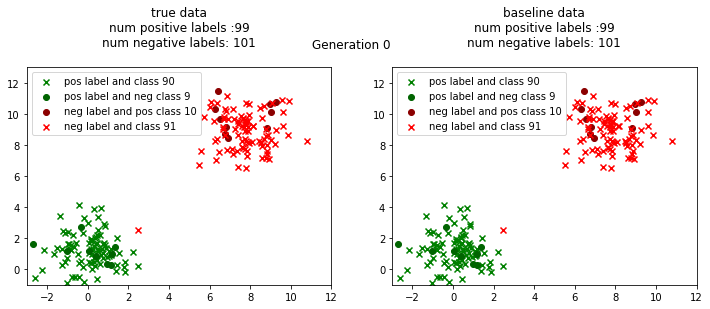

In [6]:
l.init_data()
l.plot_generation()

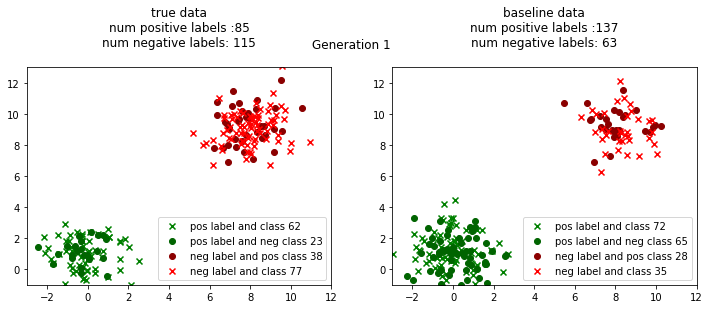

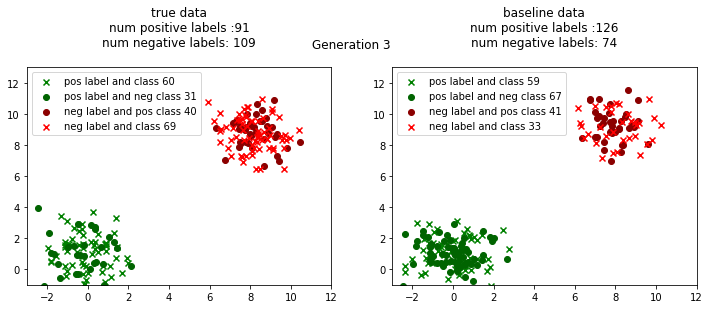

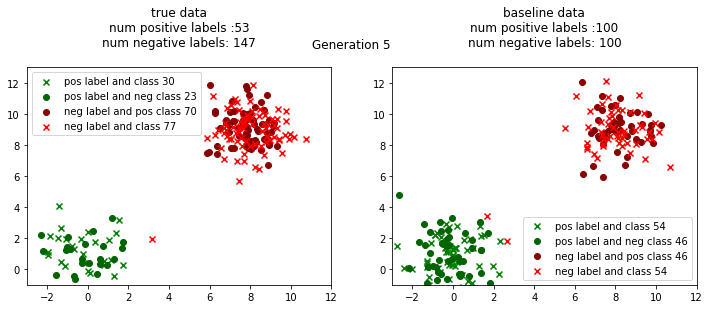

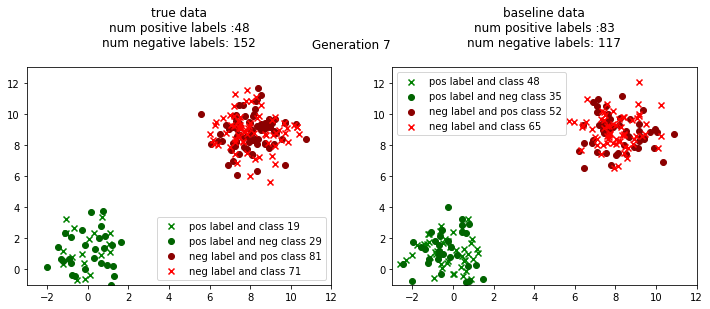

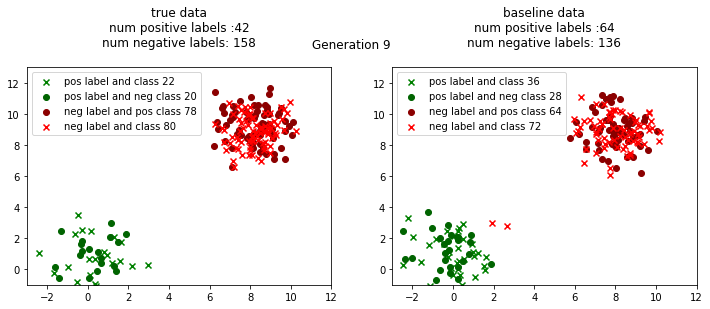

In [7]:
for i in range(10):

    l.run_generation()
    l._run_baseline_generation()
    if i % 2 == 0:
        l.plot_generation()

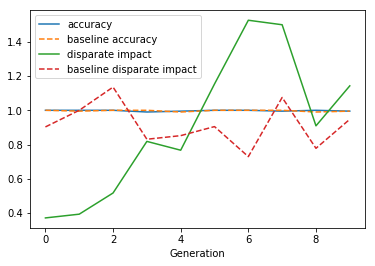

In [8]:
l.plot(["accuracy", "disparate impact"])

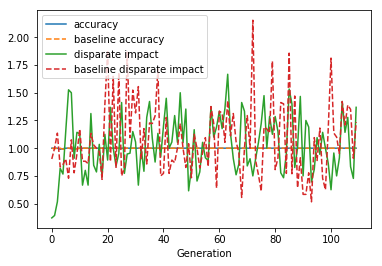

In [9]:
l.run(100)
l.plot(["accuracy", "disparate impact"])